In [26]:
import requests # pip install requests
from bs4 import BeautifulSoup # pip install beautifulsoup4
import pandas as pd
import geopandas as gpd
from collections import Counter
import re
import matplotlib.pyplot as plt
import contextily as ctx
from IPython.display import display, IFrame

In [8]:
# Specify the URL of the webpage you want to display
url = "https://www.navitime.co.jp/freeword/?keyword=Convenience+Store&p=0&type=spot&mode="

# Set the width and height of the iframe
width = "100%"
height = "400px"

# Embed the webpage within an iframe and display it
display(IFrame(url, width=width, height=height))

In [9]:
# Convert webpage to a beautiful soup object
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# tokyo_boundary
tokyo_boundary = gpd.read_file('./JPN_Tokyo.geojson')

# Hotels

# Map-codes

In [ ]:
url = "https://www.navitime.co.jp/freeword/?keyword=hotels&p=1300&type=spot&mode="
response = requests.get(url)

# Convert to a beautiful soup object
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
page_num = 0
hotel_mapcodes = []

for each in range(1300):
    url = f"https://www.navitime.co.jp/freeword/?keyword=hotels&p={page_num}&type=spot&mode="
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for each in soup.find_all('li',{"class":"spot_list candidate"}):
        hotel_mapcodes.append(each.get('data-candidate-id'))
    page_num+=1

# Coordinates & Attributes

In [ ]:
https://www.navitime.co.jp/poi?spot=01140-RK1404&from=freeword.spotlist

In [ ]:
hotel_lat = []
hotel_lon = []
hotel_other_attrib = []

for each in hotel_mapcodes:  
    url = f"https://www.navitime.co.jp/maps/poi?code={each}&from=freeword.spotlist"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try :
        hotel_lat.append(soup.find('input',{'id':'map-init-lat'}).get('value'))
    except :
        hotel_lat.append("")

    try :
        hotel_lon.append(soup.find('input',{'id':'map-init-lon'}).get('value'))
    except :
        hotel_lon.append("")
    try :
        hotel_other_attrib.append(soup.find('input',{'id':'map-poi-data'}).get('value'))
    except :
        hotel_other_attrib.append("")

navitime_hotels = pd.DataFrame({'map_code': hotel_mapcodes,'lat': hotel_lat,'lon': hotel_lon,'other_attrib':hotel_other_attrib})
navitime_hotels.to_csv('./total_japan/hotels_japan_26000.csv', index=False)

navitime_hotels_japan_gdf = gpd.GeoDataFrame(
    navitime_hotels, geometry=gpd.points_from_xy(x=navitime_hotels.lon, y=navitime_hotels.lat)
)

hotels_tokyo = gpd.clip(navitime_hotels_japan_gdf,tokyo_boundary)

In [121]:
hotels_japan = pd.read_csv("./total_japan/hotels_japan_26000.csv")     
hotels_japan.head(3)

,map_code,lat,lon,other_attrib
0,01140-RK1404,35.692514,139.690855,"{""code"":""01140-RK1404"",""provider"":{""id"":""01140..."
1,01140-RK78151,35.662930,139.760856,"{""code"":""01140-RK78151"",""provider"":{""id"":""0114..."
2,01140-RK28439,35.680380,139.735038,"{""code"":""01140-RK28439"",""provider"":{""id"":""0114..."


In [122]:
hotels_japan.shape

(26000, 4)

In [80]:
hotels_tokyo = gpd.read_file("./tokyo_clip/hotels_tokyo.geojson")
hotels_tokyo.head(3)

,type,lon,lat,Address,Name,geometry
0,hotel,139.896221,35.645572,千葉県浦安市東野2-25-25,M4 design hotel,POINT (139.89622 35.64557)
1,hotel,139.699895,35.699091,東京都新宿区百人町1-9-18,HOTEL CHELSEA,POINT (139.69989 35.69909)
2,hotel,139.695026,35.658131,東京都渋谷区円山町2-15,HOTEL ZERO III(スリー),POINT (139.69503 35.65813)


In [81]:
hotels_tokyo.shape

(2974, 6)

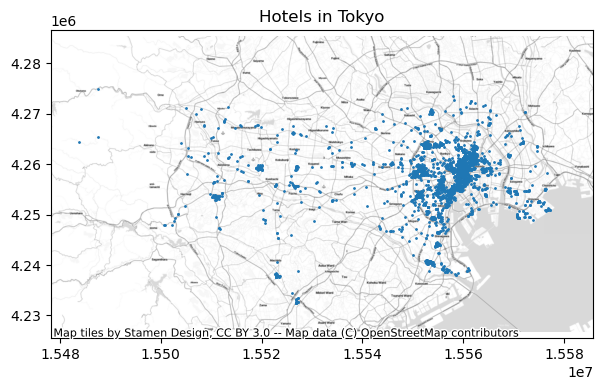

In [37]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
hotels_tokyo.plot(ax=ax, markersize=1)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=hotels_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Hotels in Tokyo')
plt.show()

# Gas Station

# Map-codes

In [ ]:
page_num = 0
gas_station_out_list = []

for each in range(2181):
    url = f"https://www.navitime.co.jp/freeword/?keyword=Gas+Station&p={page_num}&type=spot&mode="
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for each in soup.find_all('li',{"class":"spot_list candidate"}):
        gas_station_out_list.append(each.get('data-candidate-id'))
    page_num+=1

# Coordinates & Attributes

In [ ]:
gas_station_lat = []
gas_station_lon = []
gas_station_attrib = []

for each in gas_station_out_list:  
    url = f"https://www.navitime.co.jp/maps/poi?code={each}&from=freeword.spotlist"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try :
        gas_station_lat.append(soup.find('input',{'id':'map-init-lat'}).get('value'))
    except :
        gas_station_lat.append("")

    try :
        gas_station_lon.append(soup.find('input',{'id':'map-init-lon'}).get('value'))
    except :
        gas_station_lon.append("")
    try :
        gas_station_attrib.append(soup.find('input',{'id':'map-poi-data'}).get('value'))
    except :
        gas_station_attrib.append("")


gas_station_japan = pd.DataFrame({'map_code': gas_station_out_list,'lat': gas_station_lat,'lon': gas_station_lon,'other_attrib':gas_station_attrib})
gas_station_japan.to_csv('./total_japan/gas_station_japan.csv',index=False)

gas_station_japan_gdf = gpd.GeoDataFrame(
    gas_station_japan, geometry=gpd.points_from_xy(x=gas_station_japan.lon, y=gas_station_japan.lat)
)

gas_station_tokyo = gpd.clip(gas_station_japan_gdf,tokyo_boundary)

In [82]:
gas_station_csv = pd.read_csv("./total_japan/gas_station_japan_43620.csv")  
gas_station_csv.head(3)

,map_code,lat,lon,other_attrib
0,02022-1065471,35.748429,139.624369,"{""code"":""02022-1065471"",""provider"":{""id"":""0202..."
1,02022-1065474,35.665391,139.370258,"{""code"":""02022-1065474"",""provider"":{""id"":""0202..."
2,02022-1065475,35.444133,139.384451,"{""code"":""02022-1065475"",""provider"":{""id"":""0202..."


In [83]:
gas_station_csv.shape

(43620, 4)

In [89]:
gas_station_tokyo = gpd.read_file("./tokyo_clip/gas_station_tokyo.geojson") 
gas_station_tokyo.head(3)

,Name,lat,lon,Address,type,geometry
0,訪問看護ステーション東竹の塚・居宅部,35.796944,139.796034,東京都足立区竹の塚5-31-8,gas_station,POINT (139.79603 35.79694)
1,Dr.Drive セルフ保木間店 / (株)ENEOSフロンティア,35.796983,139.802647,東京都足立区保木間4-1-3,gas_station,POINT (139.80265 35.79698)
2,(株)ダイワエナジー,35.7977,139.761772,東京都足立区入谷7-5-3,gas_station,POINT (139.76177 35.79770)


In [90]:
gas_station_tokyo.shape

(1747, 6)

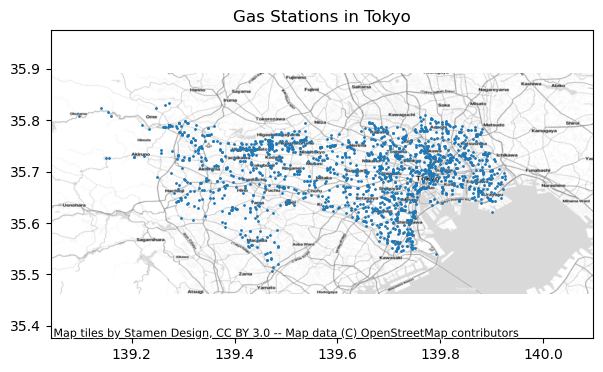

In [38]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
gas_station_tokyo.plot(ax=ax, markersize=1)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=gas_station_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Gas Stations in Tokyo')
plt.show()

# Amusement Park

# Map-codes

In [ ]:
page_num = 0
amusement_park_out_list = []

for each in range(63):
    url = f"https://www.navitime.co.jp/freeword/?keyword=Amusement+Park&p={page_num}&type=spot&mode="
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for each in soup.find_all('li',{"class":"spot_list candidate"}):
        amusement_park_out_list.append(each.get('data-candidate-id'))
    page_num+=1

# Coordinates & Attributes

In [ ]:
amusement_park_lat = []
amusement_park_lon = []
amusement_park_other_attrib = []

for each in amusement_park_out_list:  
    url = f"https://www.navitime.co.jp/maps/poi?code={each}&from=freeword.spotlist"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try :
        amusement_park_lat.append(soup.find('input',{'id':'map-init-lat'}).get('value'))
    except :
        amusement_park_lat.append("")

    try :
        amusement_park_lon.append(soup.find('input',{'id':'map-init-lon'}).get('value'))
    except :
        amusement_park_lon.append("")
    try :
        amusement_park_other_attrib.append(soup.find('input',{'id':'map-poi-data'}).get('value'))
    except :
        amusement_park_other_attrib.append("")

amusement_park_japan = pd.DataFrame({'map_code': amusement_park_out_list,'lat': amusement_park_lat,'lon': amusement_park_lon,'other_attrib':amusement_park_other_attrib})
amusement_park_japan.to_csv('./total_japan/amusement_park_japan.csv',index=False)

amusement_park_japan_gdf = gpd.GeoDataFrame(
    amusement_park_japan, geometry=gpd.points_from_xy(x=amusement_park_japan.lon, y=amusement_park_japan.lat)
)

amusement_park_tokyo = gpd.clip(amusement_park_japan_gdf,tokyo_boundary)

In [92]:
parks_japan = pd.read_csv("./total_japan/parks_japan_81080.csv")
parks_japan.head(3)

,Map_code,Latitude,Longitude,Attributes
0,02301-1400453,35.632548,139.881327,"{""code"":""02301-1400453"",""provider"":{""id"":""0230..."
1,02301-1400452,35.625674,139.884172,"{""code"":""02301-1400452"",""provider"":{""id"":""0230..."
2,02301-1301096,34.667157,135.435614,"{""code"":""02301-1301096"",""provider"":{""id"":""0230..."


In [93]:
parks_japan.shape

(81080, 4)

In [94]:
amusement_park_tokyo = gpd.read_file("./tokyo_clip/amusement_park_tokyo.geojson")     
amusement_park_tokyo.head(3)

,Name,lat,lon,Address,type,geometry
0,隅田児童遊園,35.732193,139.823302,東京都墨田区墨田4-23-12,amusement_park,POINT (139.82330 35.73219)
1,墨田二丁目児童遊園,35.732218,139.818728,東京都墨田区墨田2-42-4,amusement_park,POINT (139.81873 35.73222)
2,隅田西児童遊園,35.732408,139.819988,東京都墨田区墨田3-31-2,amusement_park,POINT (139.81999 35.73241)


In [95]:
amusement_park_tokyo.shape

(457, 6)

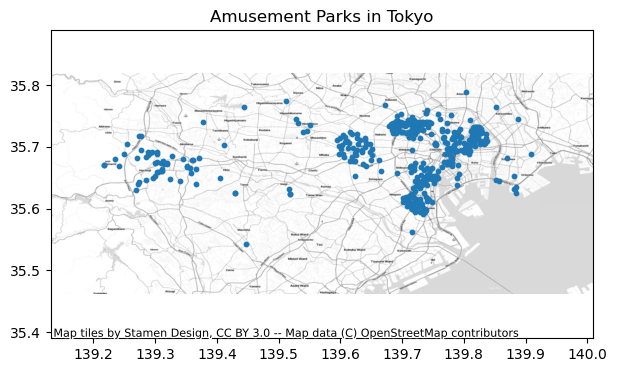

In [50]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
amusement_park_tokyo.plot(ax=ax, markersize=10)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=amusement_park_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Amusement Parks in Tokyo')
plt.show()

# Bars

# Map-codes

In [134]:
page_num = 0
bars_out_list = []

for each in range(5):
    url = f"https://www.navitime.co.jp/freeword/?keyword=Bars&p={page_num}&type=spot&mode="
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for each in soup.find_all('li',{"class":"spot_list candidate"}):
        bars_out_list.append(each.get('data-candidate-id'))
    page_num+=1

# Coordinates & Attributes

In [ ]:
# Initialize lists to store data
bar_lat = []
bar_lon = []
other_attrib = []

# Assuming you have a list named bars_out_list
# bars_out_list = [...]

for each in bars_out_list:
    url = f"https://www.navitime.co.jp/maps/poi?code={each}&from=freeword.spotlist"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    try:
        lat = soup.find('input', {'id': 'map-init-lat'}).get('value')
    except:
        lat = ""

    try:
        lon = soup.find('input', {'id': 'map-init-lon'}).get('value')
    except:
        lon = ""

    try:
        other_attrib_data = soup.find('input', {'id': 'map-poi-data'}).get('value')
    except:
        other_attrib_data = ""
    
    # Append the data to respective lists
    bar_lat.append(lat)
    bar_lon.append(lon)
    other_attrib.append(other_attrib_data)

# Create a DataFrame from the collected data
navitime_bars = pd.DataFrame({'map_code': bars_out_list, 'lat': bar_lat, 'lon': bar_lon, 'other_attrib': other_attrib})
navitime_bars.to_csv('/home/lohitd@nextbillion.ai/Downloads/navitime_extraction/navitime_bars_coordinates.csv', index=False)


navitime_bars_gdf = gpd.GeoDataFrame(
    navitime_bars, geometry=gpd.points_from_xy(x=navitime_bars.lon, y=navitime_bars.lat)
)
navitime_bars_tokyo = gpd.clip(navitime_bars_gdf,tokyo_boundary)

In [96]:
Tokyo_Bars = gpd.read_file("./tokyo_clip/Tokyo_Bars.geojson")  
Tokyo_Bars.head(3)

,lon,lat,Address,Name,type,geometry
0,139.698059,35.688754,東京都新宿区西新宿1-18-13 近江ビルB1F,Di PUNTO 西新宿一丁目店,bar,POINT (139.69806 35.68875)
1,139.781931,35.77487,東京都足立区西新井本町5-8-10 永塚ビル1F,せんべろ立ち飲み ドラム缶 西新井店,bar,POINT (139.78193 35.77487)
2,139.698448,35.657771,東京都渋谷区道玄坂1-13-1,アボカドバル セッソマット,bar,POINT (139.69845 35.65777)


In [97]:
Tokyo_Bars.shape

(4525, 6)

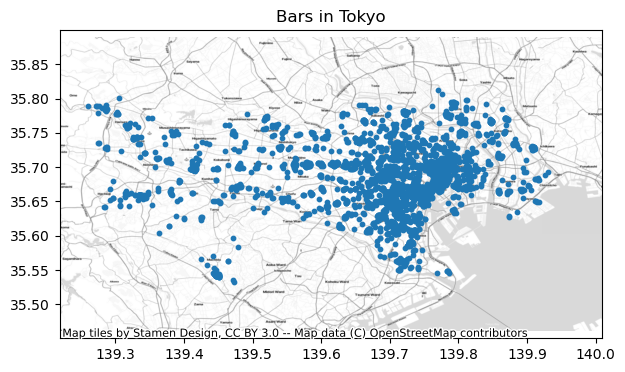

In [53]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
Tokyo_Bars.plot(ax=ax, markersize=10)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=Tokyo_Bars.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Bars in Tokyo')
plt.show()

# Baseball Stadium

In [98]:
baseball_stadium_japan = pd.read_csv("./total_japan/baseball_stadium_japan_2200.csv")
baseball_stadium_japan.head(3)

,map_code,lat,lon,other_attrib,geometry
0,02301-1900647n,34.721512,135.361521,"{""code"":""02301-1900647n"",""provider"":{""id"":""023...",POINT (135.361521 34.721512)
1,02301-1301275,34.669292,135.476021,"{""code"":""02301-1301275"",""provider"":{""id"":""0230...",POINT (135.476021 34.669292)
2,02301-1300571n,35.705618,139.751916,"{""code"":""02301-1300571n"",""provider"":{""id"":""023...",POINT (139.751916 35.705618)


In [99]:
baseball_stadium_tokyo = gpd.read_file("./tokyo_clip/baseball_stadium_tokyo.geojson")  
baseball_stadium_tokyo.head(3)

,Name,lat,lon,Address,type,geometry
0,大塚公園内運動施設軟式野球場,35.632916,139.416603,東京都八王子市松が谷66,baseball_stadium,POINT (139.41660 35.63292)
1,稲城中央公園総合グラウンド,35.633143,139.487256,東京都稲城市長峰1丁目1,baseball_stadium,POINT (139.48726 35.63314)
2,稲田少年野球場,35.637191,139.538654,神奈川県川崎市多摩区菅稲田堤2丁目9-1,baseball_stadium,POINT (139.53865 35.63719)


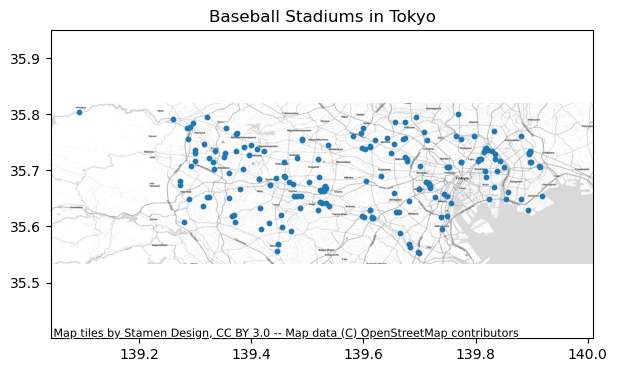

In [56]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
baseball_stadium_tokyo.plot(ax=ax, markersize=10)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=baseball_stadium_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Baseball Stadiums in Tokyo')
plt.show()

# Gym

In [110]:
gym_japan = pd.read_csv("./total_japan/gym_japan_1260.csv")
gym_japan.head(3)

,map_code,lat,lon,other_attrib,geometry
0,02301-1301096,34.667157,135.435614,"{""code"":""02301-1301096"",""provider"":{""id"":""0230...",POINT (135.435614 34.667157)
1,02301-1400453,35.632548,139.881327,"{""code"":""02301-1400453"",""provider"":{""id"":""0230...",POINT (139.881327 35.632548)
2,02301-1301586,33.089996,129.790473,"{""code"":""02301-1301586"",""provider"":{""id"":""0230...",POINT (129.790473 33.089996)


In [111]:
gym_japan.shape

(1260, 5)

In [101]:
gym_tokyo = gpd.read_file("./tokyo_clip/gym_tokyo.geojson")                
gym_tokyo.head(3)

,lon,lat,Name,Address,type,geometry
0,139.698567,35.688995,ダンディハウス パーソナルジム 新宿店(PERSONAL GYM),東京都新宿区西新宿1丁目18-17 ラウンドクロス西新宿5F,gym,POINT (139.69857 35.68899)
1,139.752263,35.700706,キックボクシングFANGジム,東京都千代田区神田三崎町3丁目3-17,gym,POINT (139.75226 35.70071)
2,139.671526,35.603867,FASTGYM24(ファストジム トゥエンティフォー) 奥沢店,東京都世田谷区奥沢5-1-16 奥沢駅前ビル2F,gym,POINT (139.67153 35.60387)


In [112]:
gym_tokyo.shape

(622, 6)

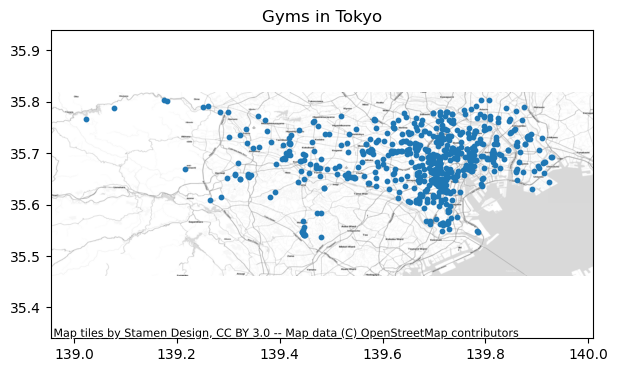

In [63]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
gym_tokyo.plot(ax=ax, markersize=10)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=gym_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Gyms in Tokyo')
plt.show()

# Izakaya

In [102]:
Izakaya_japan = pd.read_csv("./total_japan/Izakaya_japan_66760.csv")
Izakaya_japan.head(3)

,map_code,lat,lon,other_attrib
0,01328-106883,35.662490,139.698710,"{""code"":""01328-106883"",""provider"":{""id"":""01328..."
1,01125-J001134468,35.719263,139.926945,"{""code"":""01125-J001134468"",""provider"":{""id"":""0..."
2,01125-J001218375,35.683444,140.043879,"{""code"":""01125-J001218375"",""provider"":{""id"":""0..."


In [113]:
gym_tokyo.shape

(622, 6)

In [103]:
Izakaya_tokyo = gpd.read_file("./tokyo_clip/Tokyo_Izakaya.geojson")
Izakaya_tokyo.head(3)

,Address,lat,Name,lon,type,geometry
0,東京都品川区二葉2-3-10,35.60473,居酒屋三八,139.725059,izakaya,POINT (139.72506 35.60473)
1,東京都国分寺市西恋ケ窪2-6-1,35.699948,味の山家,139.465362,izakaya,POINT (139.46536 35.69995)
2,東京都世田谷区豪徳寺1-36-3,35.655779,ダイヤモンド,139.648614,izakaya,POINT (139.64861 35.65578)


In [114]:
Izakaya_tokyo.shape

(11015, 6)

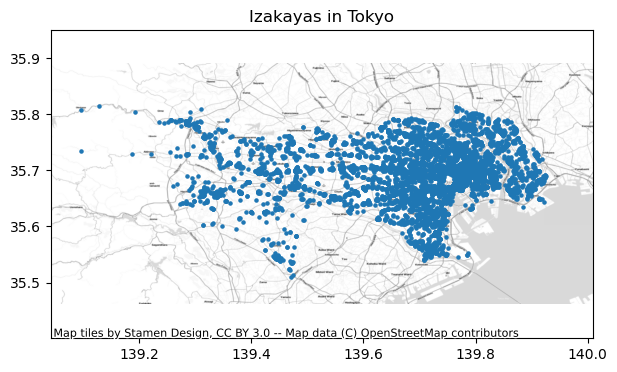

In [66]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
Izakaya_tokyo.plot(ax=ax, markersize=5)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=Izakaya_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Izakayas in Tokyo')
plt.show()

# Convention Centres

In [104]:
convention_centre_japan = pd.read_csv("./total_japan/convention_centre_japan_780.csv")  
convention_centre_japan.head(3)

,map_code,lat,lon,other_attrib,geometry
0,02301-1300613n,35.629758,139.794451,"{""code"":""02301-1300613n"",""provider"":{""id"":""023...",POINT (139.794451 35.629758)
1,02022-1077468,34.689309,135.486197,"{""code"":""02022-1077468"",""provider"":{""id"":""0202...",POINT (135.486197 34.689309)
2,02301-4500001,35.132326,136.898290,"{""code"":""02301-4500001"",""provider"":{""id"":""0230...",POINT (136.89829 35.132326)


In [115]:
convention_centre_japan.shape

(780, 5)

In [105]:
convention_centre_tokyo = gpd.read_file("./tokyo_clip/convention_centre_tokyo.geojson")  
convention_centre_tokyo.head(3)

,Name,lat,lon,Address,type,geometry
0,東京ビッグサイト,35.629758,139.794451,東京都江東区有明3-11-1,convention_centre,POINT (139.79445 35.62976)
1,東京都立産業貿易センタ- 浜松町館,35.654772,139.761307,東京都港区海岸1-7-8 東京産業貿易会館,convention_centre,POINT (139.76131 35.65477)
2,ヴィラフォンテーヌ グランド 東京汐留 コンファレンスセンター,35.662259,139.760011,東京都港区東新橋1-9-2 汐留住友ビル1F,convention_centre,POINT (139.76001 35.66226)


In [116]:
convention_centre_tokyo.shape

(57, 6)

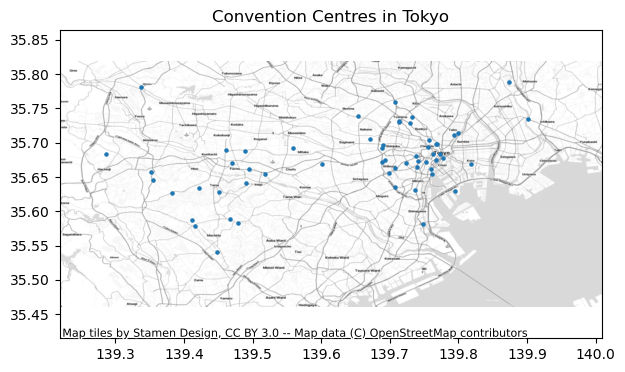

In [71]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
convention_centre_tokyo.plot(ax=ax, markersize=5)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=convention_centre_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Convention Centres in Tokyo')
plt.show()

# Movie Theaters

In [106]:
movie_theater_japan = pd.read_csv("./total_japan/movie_theater_japan_280.csv")  
movie_theater_japan.head(3)

,map_code,lat,lon,other_attrib,geometry
0,02022-1436395,35.691859,139.710581,"{""code"":""02022-1436395"",""provider"":{""id"":""0202...",POINT (139.710581 35.691859)
1,02301-1400010,35.672857,139.735152,"{""code"":""02301-1400010"",""provider"":{""id"":""0230...",POINT (139.735152 35.672857)
2,02301-1404348,35.704940,139.754319,"{""code"":""02301-1404348"",""provider"":{""id"":""0230...",POINT (139.754319 35.70494)


In [117]:
movie_theater_japan.shape

(280, 5)

In [107]:
movie_theater_tokyo = gpd.read_file("./tokyo_clip/movie_theater_tokyo.geojson")
movie_theater_tokyo.head(3)

,Name,lat,lon,Address,type,geometry
0,神保町 よしもと漫才劇場,35.695047,139.760966,東京都千代田区神田神保町1-23 神保町シアター ビル 2F,movie_theater,POINT (139.76097 35.69505)
1,ZEAL THEATER(ジール シアター) 新宿,35.696308,139.701203,東京都新宿区歌舞伎町2-44-1 東京都健康プラザハイジア 17F,movie_theater,POINT (139.70120 35.69631)
2,新宿シアター・ミラクル,35.696355,139.700371,東京都新宿区歌舞伎町2-45-2 カイダ第3ジャストビル 4F,movie_theater,POINT (139.70037 35.69635)


In [118]:
movie_theater_tokyo.shape

(103, 6)

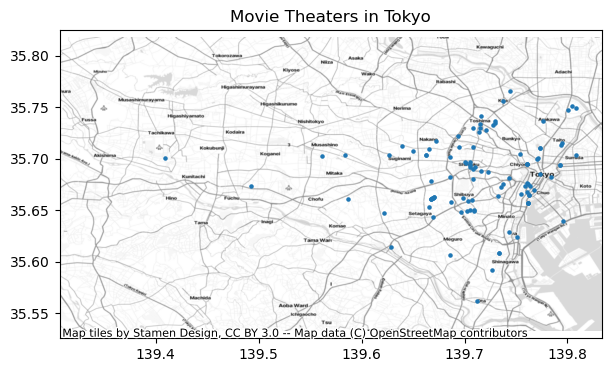

In [75]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
movie_theater_tokyo.plot(ax=ax, markersize=5)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=movie_theater_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Movie Theaters in Tokyo')
plt.show()

# Theaters

In [108]:
theatre_japan = pd.read_csv("./total_japan/theatre_japan_3398.csv")
theatre_japan.head(3)

,map_code,lat,lon,other_attrib,geometry
0,02301-1300566n,35.669451,139.767762,"{""code"":""02301-1300566n"",""provider"":{""id"":""023...",POINT (139.767762 35.669451)
1,02301-1403924,35.688010,139.786987,"{""code"":""02301-1403924"",""provider"":{""id"":""0230...",POINT (139.786987 35.68801)
2,02300-1016090,35.690104,139.705870,"{""code"":""02300-1016090"",""provider"":{""id"":""0230...",POINT (139.70587 35.690104)


In [119]:
theatre_japan.shape

(3398, 5)

In [109]:
theater_tokyo = gpd.read_file("./tokyo_clip/theater_tokyo.geojson")
theater_tokyo.head(3)

,Name,lat,lon,Address,type,geometry
0,シルク・ドゥ・ソレイユ シアター東京,35.632492,139.889341,千葉県浦安市舞浜2番地50,theatre,POINT (139.88934 35.63249)
1,舞浜アンフィシアター,35.632622,139.889103,千葉県浦安市舞浜2-50,theatre,POINT (139.88910 35.63262)
2,レインフォレスト・カフェ・トーキョー,35.633957,139.886446,千葉県浦安市舞浜1-4-132 イクスピアリ2F シアター・フロント,theatre,POINT (139.88645 35.63396)


In [120]:
theater_tokyo.shape

(950, 6)

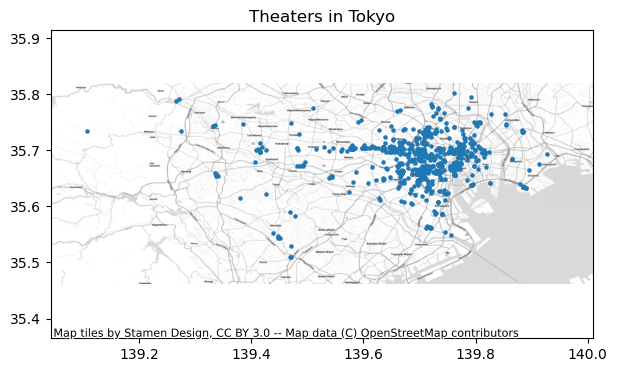

In [79]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
theater_tokyo.plot(ax=ax, markersize=5)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=theater_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Theaters in Tokyo')
plt.show()

# Sports Complex

# Map-codes

In [ ]:
page_num = 0
sports_complex_out_list = []

for each in range(119):
    url = f"https://www.navitime.co.jp/freeword/?keyword=Sports+Stadium&p={page_num}&type=spot&mode="
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for each in soup.find_all('li',{"class":"spot_list candidate"}):
        sports_complex_out_list.append(each.get('data-candidate-id'))
    page_num+=1

# Coordinates & Attributes

In [ ]:
sports_stadium_lat = []
sports_stadium_lon = []
sports_stadium_other_attrib = []

for each in sports_complex_out_list:  
    url = f"https://www.navitime.co.jp/maps/poi?code={each}&from=freeword.spotlist"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try :
        sports_stadium_lat.append(soup.find('input',{'id':'map-init-lat'}).get('value'))
    except :
        sports_stadium_lat.append("")

    try :
        sports_stadium_lon.append(soup.find('input',{'id':'map-init-lon'}).get('value'))
    except :
        sports_stadium_lon.append("")
    try :
        sports_stadium_other_attrib.append(soup.find('input',{'id':'map-poi-data'}).get('value'))
    except :
        sports_stadium_other_attrib.append("")

In [ ]:
sports_complex_japan = pd.DataFrame({'map_code': sports_complex_out_list,'lat': sports_stadium_lat,'lon': sports_stadium_lon,'other_attrib':sports_stadium_other_attrib})
sports_complex_japan.to_csv('./total_japan/sports_complex_japan.csv',index=False)


sports_complex_japan_gdf = gpd.GeoDataFrame(
    sports_complex_japan, geometry=gpd.points_from_xy(x=sports_complex_japan.lon, y=sports_complex_japan.lat)
)

sports_complex_tokyo = gpd.clip(sports_complex_japan_gdf,tokyo_boundary)

In [85]:
sports_complex_japan = pd.read_csv("./total_japan/sports_complex_japan_12.csv")
sports_complex_japan.head(3)

,map_code,lat,lon,other_attrib,geometry
0,02022-1187981,36.581811,136.646827,"{""code"":""02022-1187981"",""provider"":{""id"":""0202...",POINT (136.646827 36.581811)
1,02022-1325728,35.647022,139.786906,"{""code"":""02022-1325728"",""provider"":{""id"":""0202...",POINT (139.786906 35.647022)
2,02022-1294223,35.658720,139.620592,"{""code"":""02022-1294223"",""provider"":{""id"":""0202...",POINT (139.620592 35.65872)


In [86]:
sports_complex_japan.shape

(12, 5)

In [42]:
sports_complex_tokyo = gpd.read_file("./tokyo_clip/sports_complex_tokyo.geojson")
sports_complex_tokyo

,lon,map_code,lat,type,geometry
0,139.722689,02022-1235712,35.649662,sports_complex,POINT (139.72269 35.64966)
1,139.620592,02022-1294223,35.65872,sports_complex,POINT (139.62059 35.65872)
2,139.786906,02022-1325728,35.647022,sports_complex,POINT (139.78691 35.64702)
3,139.770509,02022-1216911,35.700362,sports_complex,POINT (139.77051 35.70036)
4,139.722803,02022-1281150,35.64932,sports_complex,POINT (139.72280 35.64932)
5,139.722756,02022-1289157,35.649472,sports_complex,POINT (139.72276 35.64947)


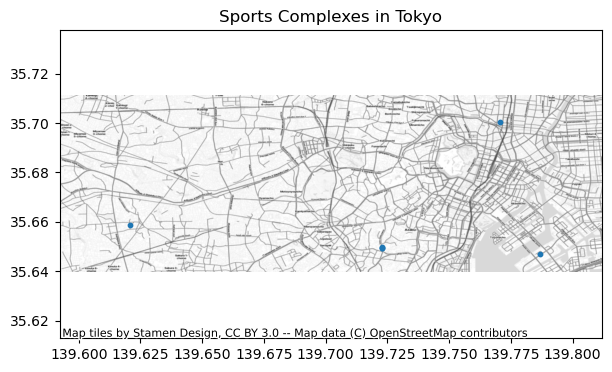

In [45]:
# Plot the points
fig, ax = plt.subplots(figsize=(7, 4))

# Replace 'complete_uk' with your GeoDataFrame
sports_complex_tokyo.plot(ax=ax, markersize=10)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=sports_complex_tokyo.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Sports Complexes in Tokyo')
plt.show()